<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- 다양한 알고리즘으로 모델을 만들고 성능을 비교합니다.

# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [2]:
# 데이터 불러오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/admission_simple.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 데이터 살펴보기
data.head()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
0,337,118,4,4.5,4.5,9.65,1,1
1,324,107,4,4.0,4.5,8.87,1,1
2,316,104,3,3.0,3.5,8.00,1,0
3,322,110,3,3.5,2.5,8.67,1,1
4,314,103,2,2.0,3.0,8.21,0,0


In [4]:
# 기술통계 확인
data.describe()

,GRE,TOEFL,RANK,SOP,LOR,GPA,RESEARCH,ADMIT
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.436000
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.496384
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.000000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.000000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.000000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,1.000000


# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [5]:
# target 확인
target = 'ADMIT'

# 데이터 분리
x = data.drop(target, axis=1)
y = data.loc[:, target]

**2) 학습용, 평가용 데이터 분리**

In [6]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

**3) 정규화**

In [7]:
# 모듈 불러오기
from sklearn.preprocessing import MinMaxScaler

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_s = scaler.transform(x_train)
x_test_s = scaler.transform(x_test)

# 4.모델링

- 본격적으로 모델을 선언하고 학습하고 평가하는 과정을 진행합니다.
- 다양한 알고리즘으로 모델을 만들고 성능을 확입니다.
- 성능 평가는 confusion_matrix, classification_report를 사용합니다.
- 사용할 알고리즘을 모두 불러옵니다.

In [20]:
# xgboost 설치
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB 3.9 MB/s eta 0:00:32
   ---------------------------------------- 1.1/124.9 MB 8.7 MB/s eta 0:00:15
    --------------------------------------- 1.9/124.9 MB 10.8 MB/s eta 0:00:12
    --------------------------------------- 2.8/124.9 MB 13.0 MB/s eta 0:00:10
   - -------------------------------------- 3.5/124.9 MB 12.9 MB/s eta 0:00:10
   - -------------------------------------- 4.4/124.9 MB 14.0 MB/s eta 0:00:09
   - -------------------------------------- 5.2/124.9 MB 14.5 MB/s eta 0:00:09
   -- ------------------------------------- 6.3/124.9 MB 16.0 MB/s eta 0:00:08
   -- ------------------------------------- 7.0/124.9 MB 15.3 MB/s eta 0:00:08
   -- ------------------------------------- 8.0/124.9 MB 16.5 MB/s eta 0:00:08
   -- ------------------------------------- 9.1/124.9 MB 16.1 MB/s eta

In [21]:
# lightgbm 설치
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.4 MB 3.0 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.4 MB 11.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 13.2 MB/s eta 0:00:00


In [22]:
# 라이브러리 불러오기
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import *

**1) KNN**

- KNN 알고리즘으로 모델링하고 성능을 확인합니다.

In [23]:
# 선언하기
model = KNeighborsClassifier(n_neighbors=5)

In [24]:
# 학습하기
model.fit(x_train_s, y_train)

KNeighborsClassifier()

In [25]:
# 예측하기
y_pred = model.predict(x_test_s)

In [26]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[79  5]
 [15 51]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        84
           1       0.91      0.77      0.84        66

    accuracy                           0.87       150
   macro avg       0.88      0.86      0.86       150
weighted avg       0.87      0.87      0.86       150



**2) Decision Tree**

- Decision Tree 알고리즘으로 모델링하고 성능을 확인합니다.

In [27]:
# 선언하기
model = DecisionTreeClassifier(max_depth=5, random_state=1)

In [28]:
# 학습하기
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [29]:
# 예측하기
y_pred = model.predict(x_test)

In [30]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77  7]
 [13 53]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        84
           1       0.88      0.80      0.84        66

    accuracy                           0.87       150
   macro avg       0.87      0.86      0.86       150
weighted avg       0.87      0.87      0.87       150



**3) Logistic Regression**

- Logistic Regression 알고리즘으로 모델링하고 성능을 확인합니다.

In [31]:
# 선언하기
model = LogisticRegression()

In [32]:
# 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [33]:
# 예측하기
y_pred = model.predict(x_test)

In [34]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[75  9]
 [14 52]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        84
           1       0.85      0.79      0.82        66

    accuracy                           0.85       150
   macro avg       0.85      0.84      0.84       150
weighted avg       0.85      0.85      0.85       150



**4) Random Forest**

- Random Forest 알고리즘으로 모델링하고 성능을 확인합니다.

In [35]:
# 선언하기
model = RandomForestClassifier(max_depth=5, random_state=1)

In [36]:
# 학습하기
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, random_state=1)

In [37]:
# 예측하기
y_pred = model.predict(x_test)

In [38]:
# 5단계: 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[78  6]
 [13 53]]
              precision    recall  f1-score   support

           0       0.86      0.93      0.89        84
           1       0.90      0.80      0.85        66

    accuracy                           0.87       150
   macro avg       0.88      0.87      0.87       150
weighted avg       0.88      0.87      0.87       150



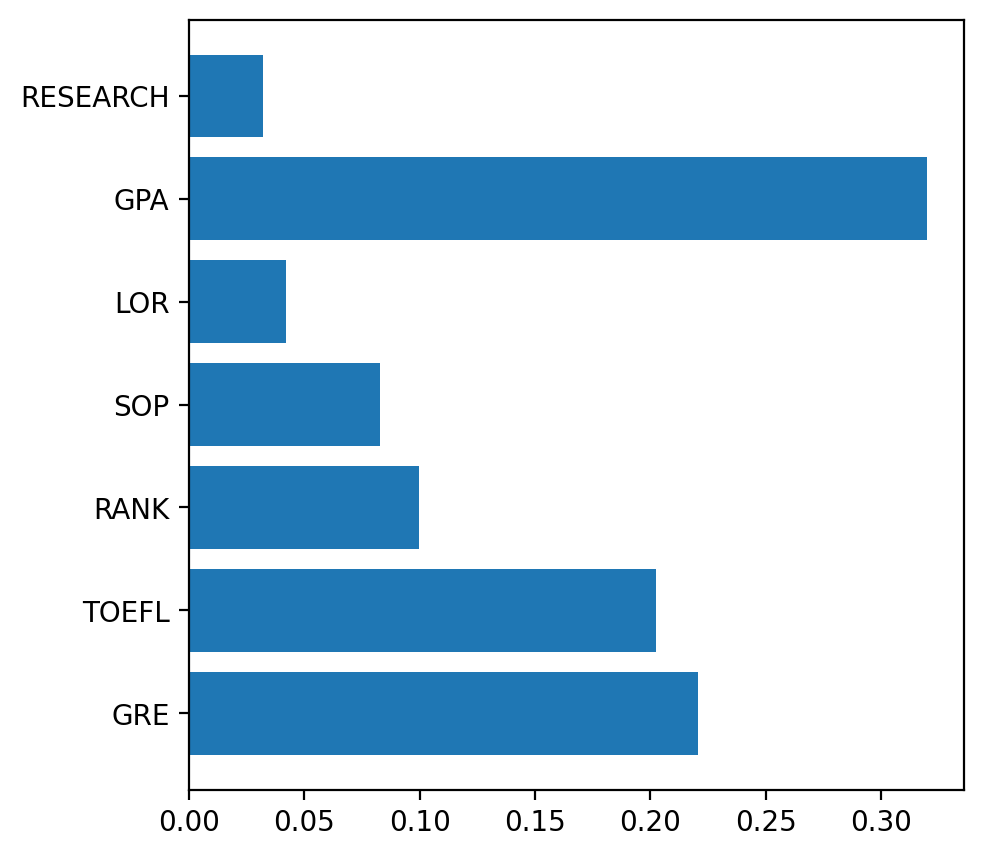

In [39]:
# Feature 중요도 확인
plt.figure(figsize=(5, 5))
plt.barh(list(x), model.feature_importances_)
plt.show()

**5) XGBoost**

- XGBoost 알고리즘으로 모델링하고 성능을 확인합니다.

In [40]:
# 선언하기
model = XGBClassifier(max_depth=5, random_state=1)

In [41]:
# 학습하기
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [42]:
# 예측하기
y_pred = model.predict(x_test)

In [43]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77  7]
 [15 51]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        84
           1       0.88      0.77      0.82        66

    accuracy                           0.85       150
   macro avg       0.86      0.84      0.85       150
weighted avg       0.86      0.85      0.85       150



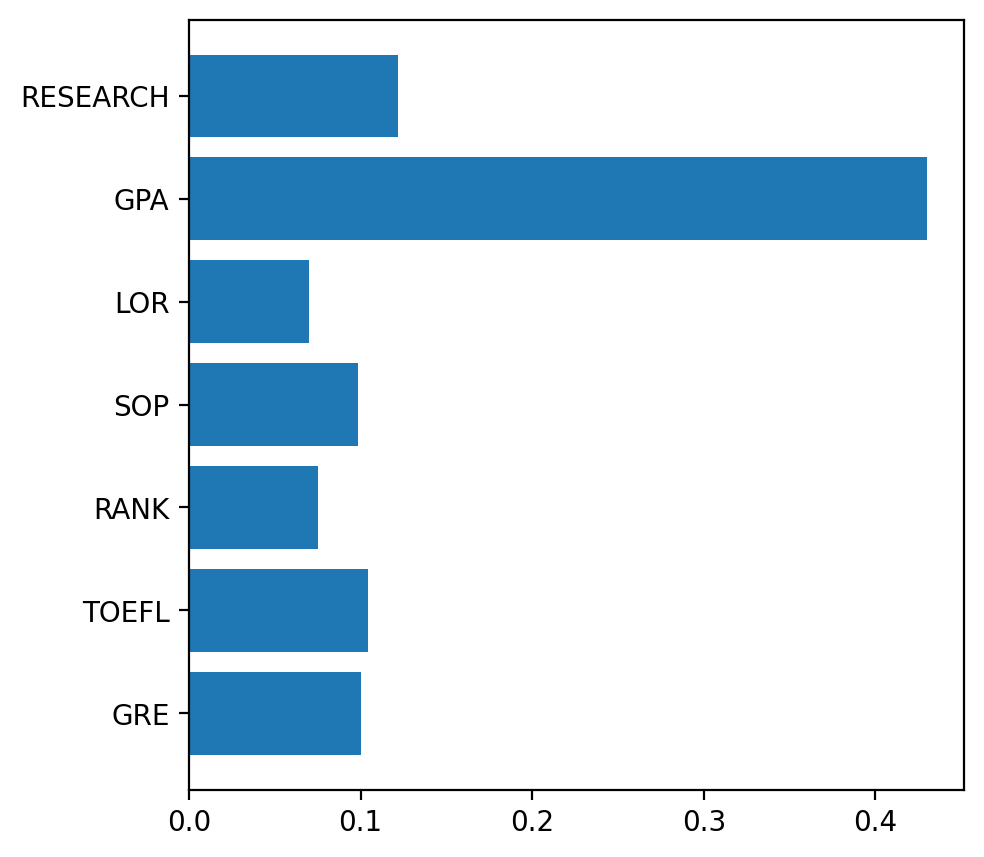

In [44]:
# Feature 중요도 확인
plt.figure(figsize=(5, 5))
plt.barh(list(x), model.feature_importances_)
plt.show()

**6) LightGBM**

- LightGBM 알고리즘으로 모델링하고 성능을 확인합니다.

In [45]:
# 선언하기
model = LGBMClassifier(max_depth=5, random_state=1, verbose=-100)

In [46]:
# 학습하기
model.fit(x_train, y_train)

LGBMClassifier(max_depth=5, random_state=1, verbose=-100)

In [47]:
# 예측하기
y_pred = model.predict(x_test)

In [48]:
# 평가하기
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[77  7]
 [14 52]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        84
           1       0.88      0.79      0.83        66

    accuracy                           0.86       150
   macro avg       0.86      0.85      0.86       150
weighted avg       0.86      0.86      0.86       150

